In [69]:
#!pip install wordcloud

In [70]:
import os
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [83]:
webpage_folder = "pages"
text = [] # An array of strings. Each string is the text of one webpage

for filename in os.listdir(webpage_folder):
    filepath = os.path.join(webpage_folder, filename)
    #print(filename)
    with open(filepath, "r", encoding = 'utf-8', errors='ignore') as file:
        html = file.read()
        soup = BeautifulSoup(html, 'html.parser')
        paragraphs = soup.select("#mw-content-text p,h2")
        html_text = "" # Text content for this webpage
        for paragraph in paragraphs:
            if '[edit]' in paragraph.get_text():
                continue
            html_text += (paragraph.getText() + "\n")
        # remove white spaces
        html_text = re.sub(r'\s+', ' ', html_text)
        text.append(html_text)
        
   

In [84]:
# Check the format of the text
print(text[0])  

Contents A systems analyst, also known as business technology analyst, is an information technology (IT) professional who specializes in analyzing, designing and implementing information systems. Systems analysts assess the suitability of information systems in terms of their intended outcomes and liaise with end users, software vendors and programmers in order to achieve these outcomes.[1] A systems analyst is a person who uses analysis and design techniques to solve business problems using information technology. Systems analysts may serve as change agents who identify the organizational improvements needed, design systems to implement those changes, and train and motivate others to use the systems.[2] As of 2015, the sectors employing the greatest numbers of computer systems analysts were state government, insurance, computer system design, professional and commercial equipment, and company and enterprise management. The number of jobs in this field is projected to grow from 487,000

In [85]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# Computer TF-IDF scores
X = vectorizer.fit_transform(text)

In [86]:
matrix = X.toarray()
print(matrix)

[[0.10681539 0.03175878 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00781802 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04849054 0.00786404 0.00919375 ... 0.         0.         0.        ]]


In [87]:
# Get all words
words = vectorizer.get_feature_names_out()

# Create a DataFrame
df = pd.DataFrame(data=matrix, columns=words)

In [88]:
# A dictionary to store the sum of TF-IDF scores for each word
scores = {}
for word, score in df.sum().items():
    scores[word] = score

In [89]:
# Sort the dictionary by the sum of TF-IDF scores
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

In [90]:
# Print sorted scores
for word, score in sorted_scores.items():
    print(f"{word}: {score}")

data: 42.68715724316742
information: 26.07438012638718
science: 16.854856919602113
social: 16.139620150504737
library: 13.738026773128635
knowledge: 11.872852539247818
used: 11.036517419130643
research: 10.145999179506406
studies: 9.99380532309307
computer: 9.912167959673459
systems: 9.46931287585122
history: 9.210080099816222
human: 9.184199370721474
law: 8.915655922419619
use: 8.83482187674178
new: 8.68210519565755
theory: 8.562716708417325
public: 8.133788460534989
political: 8.063384255881234
study: 7.843873351675344
society: 7.839912114616649
analysis: 7.700116724703223
libraries: 7.696524246058833
world: 7.648066754304373
technology: 7.633822499939213
example: 7.606358014016321
university: 7.404333456628244
design: 7.2934766546883045
software: 7.247782941998101
scientific: 7.1219687338753985
business: 7.107462556357663
management: 7.026120103882169
visualization: 6.818120463416363
work: 6.811106931937251
field: 6.747262479229875
development: 6.715169626373108
model: 6.63597462784

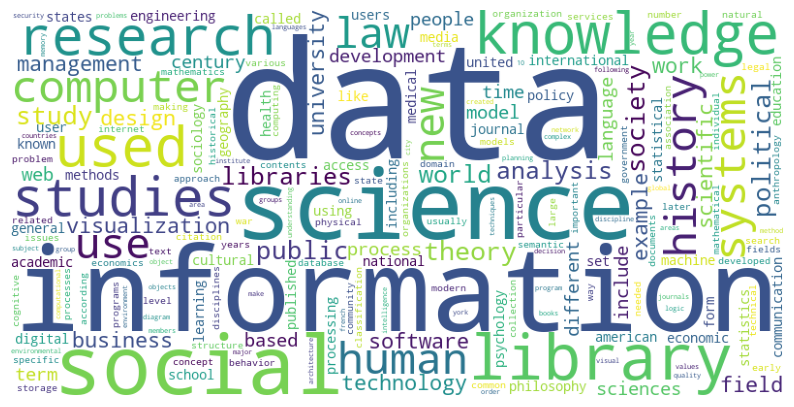

In [91]:
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white').fit_words(sorted_scores)

plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()